**Predicting the score of a person based on number of study hours**

**Importing libraries**

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/student-scores/student_scores.csv


**Loading dataset**

In [4]:
score=pd.read_csv("../input/student-scores/student_scores.csv")

**Exploring dataset**

In [5]:
score.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
score.isna().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
x=score.iloc[:,:-1].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [8]:
y=score.iloc[:,1:2].values
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

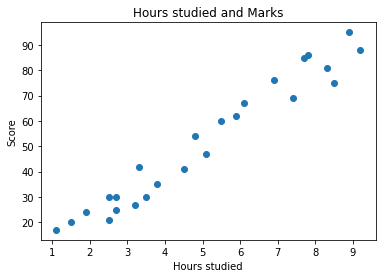

In [9]:
plt.scatter(x,y)
plt.title("Hours studied and Marks")
plt.xlabel("Hours studied")
plt.ylabel("Score")
plt.show()

**Training and testing split**

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=0)
print("X-Train:",x_train.shape)
print("X-Test:",x_test.shape)
print("Y-Train:",y_train.shape)
print("Y-Test:",y_test.shape)

X-Train: (20, 1)
X-Test: (5, 1)
Y-Train: (20, 1)
Y-Test: (5, 1)


**Training**

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
print("Training complete")

Training complete


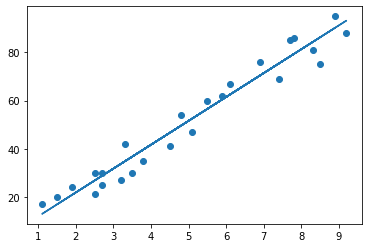

In [12]:
line = regressor.coef_*x+regressor.intercept_
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

**Testing**

In [13]:
y_pred = regressor.predict(x_test)

In [14]:
df = pd.DataFrame(y_pred,index=range(0,5),columns = ["Predicted"])
df["Actual"] = y_test
df

,Predicted,Actual
0,16.884145,20
1,33.732261,27
2,75.357018,69
3,26.794801,30
4,60.491033,62


**Evaluating the performance of our model**

In [20]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [25]:
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


**Conclusion**

In [27]:
hours = np.array(9.25)
hours = hours.reshape(-1, 1)
pred = regressor.predict(hours)
print("Number of hours = {}".format(hours))
print("Predicted score = {}".format(pred[0]))

Number of hours = [[9.25]]
Predicted score = [93.69173249]
